<a href="https://colab.research.google.com/github/Rehan6541/AI/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

The left side of the assignment destructures the returned tuples from load_data(). Xtrain: This is the training dataset containing the images of the handwritten digits. It will be a NumPy array of shape (60000, 28, 28) where 60,000 is the number of training samples, and 28x28 is the resolution of each image. y train: This is the training labels corresponding to X_train. It contains the digit labels (0-9) for each image, with shape (60000,). (): This part is used to ignore the test data. The underscore () is a convention to signify that the value is being ignored. So, you're not storing X_test and y_test in this case.

In [ ]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

4


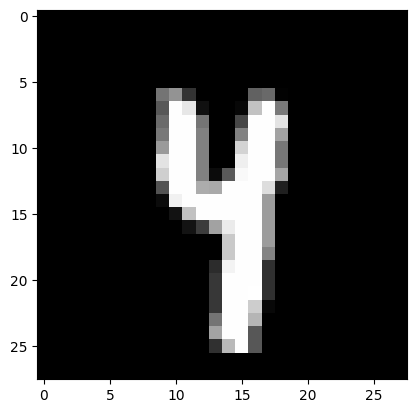

In [ ]:
i = np.random.randint(0, 60000)
#print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

# **Converting data into float format**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train[0].min(), X_train[0].max()

(0.0, 255.0)

In [ ]:
X_train = (X_train - 127.5) / 127.5

In [ ]:
X_train[0].min(), X_train[0].max()

(-1.0, 1.0)

In [ ]:
buffer_size = 60000
batch_size = 256

In [ ]:
buffer_size / batch_size # mini-batch

234.375

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

This code transforms X_train (which is typically a large dataset) into a tf.data.Dataset object, shuffles the data with a buffer size of buffer_size, and groups it into batches of size batch_size for efficient training. This is a typical preprocessing step before feeding data into a TensorFlow model

In [ ]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

## **Building the generator**

1. Batch normalization: https://keras.io/api/layers/normalization_layers/batch_normalization/
2. Leaky Relu: https://keras.io/api/layers/activation_layers/leaky_relu/
3. Funções de ativação: https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
4. Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
7 * 7 * 256

12544

In [ ]:
# 100 -> 12544
def build_generator():
  network = tf.keras.Sequential()

  network.add(layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  network.add(layers.Reshape((7, 7, 256)))

  # 7 * 7 * 128
  network.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 14 * 14 * 64
  network.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())

  # 28 * 28 * 1
  network.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

  network.summary()

  return network

In [ ]:
generator = build_generator()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_35 (LeakyReLU)           │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_10 (Reshape)                 │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_30                  │ (None, 7, 7, 128)           │         819,200 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_36 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_31                  │ (None, 14, 14, 64)          │         204,800 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_37 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_32                  │ (None, 28, 28, 1)           │           1,600 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [ ]:
generator.input

ValueError: The layer sequential_14 has never been called and thus has no defined input.

In [ ]:
noise = tf.random.normal([1, 100])
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.7171    , -0.81625885, -0.6068727 , -1.553769  , -1.0748913 ,
         0.5090913 , -1.5551461 , -0.54512423,  0.10767248,  1.2337614 ,
        -0.6203696 ,  0.19298184, -1.3981218 ,  0.59707457, -0.15851565,
        -0.26420522, -0.37766454, -0.31947872, -1.9150487 ,  0.4822629 ,
         0.606787  ,  0.19250283,  0.31119227, -0.25595185,  1.3335508 ,
         0.69895333, -1.1195642 , -0.42635623, -0.96903163,  0.49276444,
         0.8485463 , -0.23898847, -2.2742767 ,  0.42462337, -0.60725194,
         0.64128006,  1.0359702 , -0.84401995, -0.08740182,  1.8536015 ,
        -0.59803283, -0.6699267 ,  1.053773  ,  1.0104502 ,  0.5085013 ,
         0.6695318 ,  0.5717911 ,  0.08741624,  2.5517113 , -1.6182779 ,
         0.01629497, -0.44828936,  0.70102966,  1.3796717 ,  1.6013249 ,
         2.846821  , -1.8275586 , -0.6503095 ,  0.827839  , -0.86926925,
         0.3857004 , -0.4596469 ,  0.28865206,  0.5996648 ,  1.0844889 ,
 

In [ ]:
generated_image = generator(noise, training = False)

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

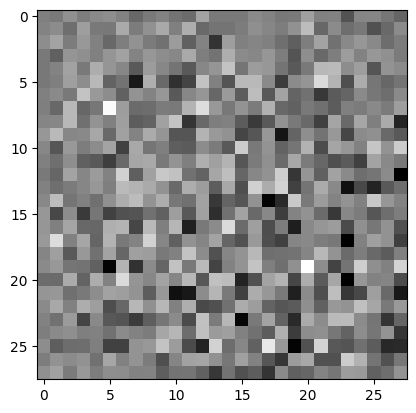

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

# **Building the Discriminator**

1.   Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
2. Conv2d x Conv2dTranspose: https://stackoverflow.com/questions/68976745/in-keras-what-is-the-difference-between-conv2dtranspose-and-conv2d



In [ ]:
def build_discriminator():
  network = tf.keras.Sequential()

  # 14 * 14 * 64
  network.add(layers.Conv2D(filters = 64, kernel_size = (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7 * 7 * 128
  network.add(layers.Conv2D(filters = 128, kernel_size = (5, 5), strides=(2, 2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [ ]:
discriminator = build_discriminator()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_38 (LeakyReLU)           │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_39 (LeakyReLU)           │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator.input

ValueError: The layer sequential_15 has never been called and thus has no defined input.

In [ ]:
discriminator(generated_image, training = False) # logits

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00243908]], dtype=float32)>

In [ ]:
tf.sigmoid(-0.0014645)

<tf.Tensor: shape=(), dtype=float32, numpy=0.49963388>

# **Error Calculation**

1.   Logits: https://deepai.org/machine-learning-glossary-and-terms/logit

###This method quantifies how well the discriminator is able to distinguish real images from fakes images.It compares the discriminator predicyions on real images with an array of 1s and the discriminator predictions on fake generated images with an array of 0s.**bold text**

In [ ]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
tf.ones_like(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
def discriminator_loss(expected_output,fake_output):
  real_loss=cross_entropy(tf.ones_like(expected_output),expected_output)
  fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
  total_loss=real_loss+fake_loss
  return total_loss

In [ ]:
def genterator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output),fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# **Training the GAN and visualizing the results**



In [ ]:
X_train

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None)>

In [ ]:
epochs=100
noise_dimension=100
number_of_images=16

In [ ]:
batch_size,noise_dimension

(256, 100)

In [ ]:
@tf.function
#This decorator tells tensorflow to compile the function into a graph
#which improves performance by optimizing the execution
#especially on large dataset or training over many iteration.
def train(images):
  noise=tf.random.normal([batch_size,noise_dimension]) # Changed noise_dim to noise_dimension
  #print(noise.shape)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    #tf.GradientTape():tensorflow's GradientTape is used to record operations
    #for automatic  diffrenttation .In this case two tapes are used to
    #Sepearately travk the computations for the generator (gen_tape)
    generated_images=generator(noise,training=True)

    expected_output=discriminator(images,training=True)
    fake_output=discriminator(generated_images,training=True)

    gen_loss=genterator_loss(fake_output)
    disc_loss=discriminator_loss(expected_output,fake_output)
    #generator (noise,training=True ): the generator takes the random noise
    #as input and produces generated_images .The training =True flag ensures
    # that any training -specific  behaviour (like dropout) is activated

    #discriminator(images,trainins=True ):this descriminator takess  the real images
    #from the dataset and produces expected_output ,which is its prediction
    #about the realness of the images.

    #discriminator(generated_images,training=True):The discriminator also
    #evaluates the generated images produced by the generator and outputs
    #fake_output,which is its prediction about the realness of the fake images

    generator_gradients=gen_tape.gradient(gen_loss,generator.trainable_variables)
    discriminator_gradients=disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    #gen_tape.gradient:computes the gradients of the gen_loss with respect to
    #the generator's trainable variables (its weighr and bias)

    #disc_tape gradient: computes the gradient of the disc loss with respect
    #to the descriminators traininable variables
    #these gradients will be used to update the descriminator

    generator_optimizer.apply_gradients(zip(generator_gradients,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,discriminator.trainable_variables))

    #gennerator_optimizer.apply_gradients: this applied to gradients to update discriminators parameters using discriminator_optimizers
    #The zip(generator_gradients, generator.trainable_variables) pairs each gradient with the corresponding trainable variable.'''

    '''discriminator_optimizer.apply_gradients: Similarly, this updates the discriminator.
    disc_tape.gradient: Computes the gradients of the disc_loss with respect to the discriminator's trainable variables.'''

In [ ]:
test_images=tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [ ]:
tf.config.run_functions_eagerly(True)
X_train_batch=X_train.as_numpy_iterator().next()
train(X_train_batch)
#Purpose: This line configures Tensorflow to run functions eagerly
#even if they are decorated with @tf.function.

#What is eager Execution :Eager execution in TensorFlow is an imperative programming environment that evaluates operations immediately,
#without building computational graphs first. This contrasts with TensorFlow’s default graph-based execution mode
#(before TensorFlow 2.0), where operations were first added to a graph and only executed later.

In [ ]:
def train_gan(dataset, epochs,test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)

In [ ]:
train_gan(X_train, epochs, test_images)

dataset: The input dataset used for training , typically a set of images ,epochs the number of training iterations(how many times the model should go through to a dataset ).
test_images:A set of test images

In [ ]:
def train_gan(dataset,epochs,test_images):
  for epoch in range(epochs):
    #print(epoch)
    for image_batch in dataset:
      #print(image_batch.shape)
      train(image_batch)

      print("Epoch: ",epoch + 1)
      generated_images=generator(test_images,training=False)
      fig=plt.figure(figsize=(10,10))
      for i in range(num_of_images):
        plt.subplot(4,4,i+1)
        plt.imshow(generated_images[i, :, :, 0]*127.5 + 127.5 , cmap='gray')
        plt.axis('off')
      plt.show()

In [ ]:
train_gan(X_train,epochs,test_images)